# Netflix Titles Dataset Analysis

This report explores various aspects of the Netflix Titles dataset to uncover insights into genre popularity, content distribution, and trends over time. The analysis includes the examination of genre popularity, content types, temporal trends, viewer ratings, content production by country, and actor appearances.

## Import Necessary Libraries and load the data


In [1]:
import pandas as pd
from collections import Counter
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.colors as colors
import plotly.offline as pyo

pyo.init_notebook_mode(connected=True)

file_path = '../data/cleaned_netflix_titles.csv'
netflix_data = pd.read_csv(file_path)

-----------------------------------------------------------------------

# 1. Genre Popularity Analysis

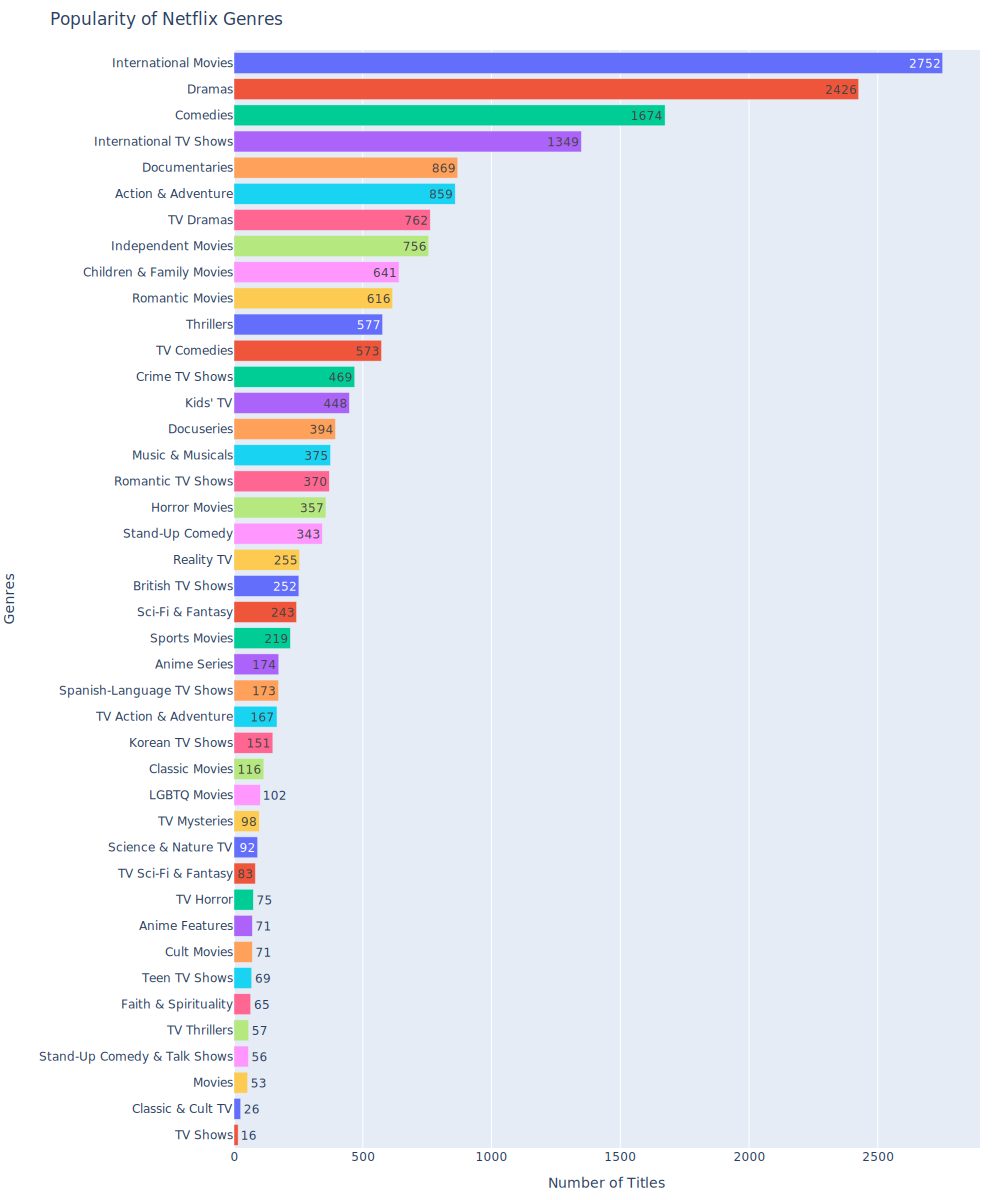

In [2]:
netflix_data['genre'] = netflix_data['listed_in'].str.split(', ')
genre_data = netflix_data.explode('genre')
genre_counts = genre_data['genre'].value_counts().reset_index()
genre_counts.columns = ['genre', 'count']

fig = px.bar(genre_counts, x='count', y='genre',
             title='Popularity of Netflix Genres',
             labels={'count':'Number of Titles', 'genre':'Genres'},
             color='genre', height=1200, width=1000,
             orientation='h',
             text='count')

fig.update_layout(
    margin=dict(l=200, r=20, t=50, b=50), 
    showlegend=False 
)

fig.update_yaxes(tickmode='linear') 

# pyo.iplot(fig) #Uncomment to generate interactive plots
fig.show("svg")

The top 5 genre's are:
- **International Movies:** 2,752 titles

- **Dramas:** 2,426 titles

- **Comedies:** 1,674 titles

- **International TV Shows:** 1,349 titles

- **Documentaries:** 869 titles

These insights demonstrate that Netflix's vast array of genres is crucial to its broad appeal, attracting and retaining a diverse range of subscribers.

-----------------------------------------------------------------------

# 2. Content Distribution Analysis

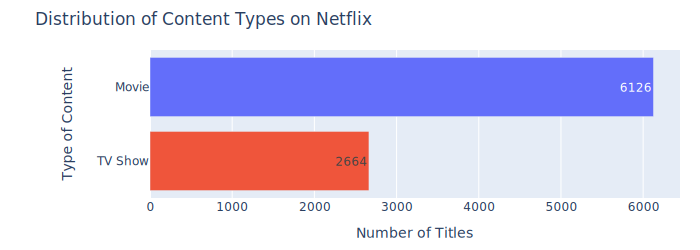

In [3]:
content_types = netflix_data['type'].value_counts().reset_index()
content_types.columns = ['type', 'count']

fig = px.bar(content_types, x='count', y='type',
             title='Distribution of Content Types on Netflix',
             labels={'count':'Number of Titles', 'type':'Type of Content'},
             color='type', height=250,
             orientation='h',
             text='count')

fig.update_layout(showlegend=False, margin=dict(l=150, r=20, t=50, b=50))

# pyo.iplot(fig) #Uncomment to generate interactive plots
fig.show("svg")

The dataset indicates a significant distribution between Movies and TV Shows on Netflix:

- **Movies**: 6,126 titles
- **TV Shows**: 2,664 titles

This distribution suggests that although Netflix has a larger library of movies, TV shows also comprise a substantial part of their content strategy, catering to binge-watchers and enthusiasts of serialised content.

-----------------------------------------------------------------------

# 3. Viewer Ratings Analysis

### 3.1. Distribution of Content by Viewer Ratings


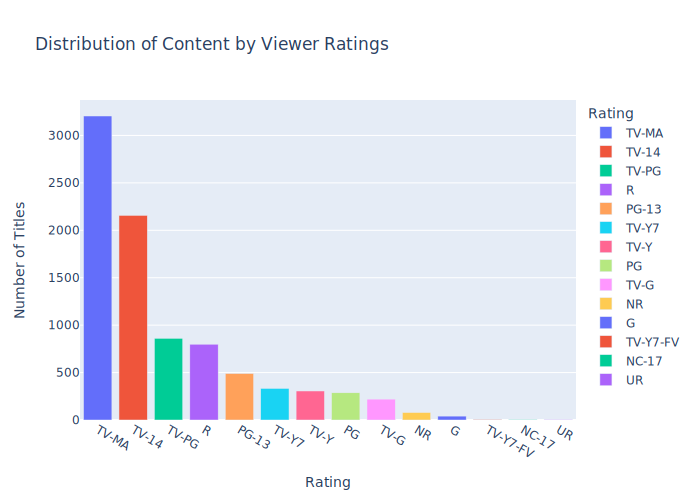

In [4]:
rating_counts = netflix_data['rating'].value_counts()

fig = px.bar(rating_counts, title='Distribution of Content by Viewer Ratings',
             labels={'value': 'Number of Titles', 'index': 'Rating'},
             color=rating_counts.index)
fig.update_layout(xaxis_title='Rating', yaxis_title='Number of Titles')

# pyo.iplot(fig) #Uncomment to generate interactive plots
fig.show("svg")

The distribution of viewer ratings provides insights into the target audience for Netflix content:

- **TV-MA** (Mature Audiences): 3,205 titles
- **TV-14** (Parents Strongly Cautioned): 2,157 titles
- **TV-PG** (Parental Guidance): 861 titles
- **R**: 799 titles
- **PG-13**: 490 titles

The substantial amount of TV-MA rated content highlights Netflix's focus on adult viewers, offering a range of mature content.

### 3.2. Yearly Distribution of Viewer Ratings

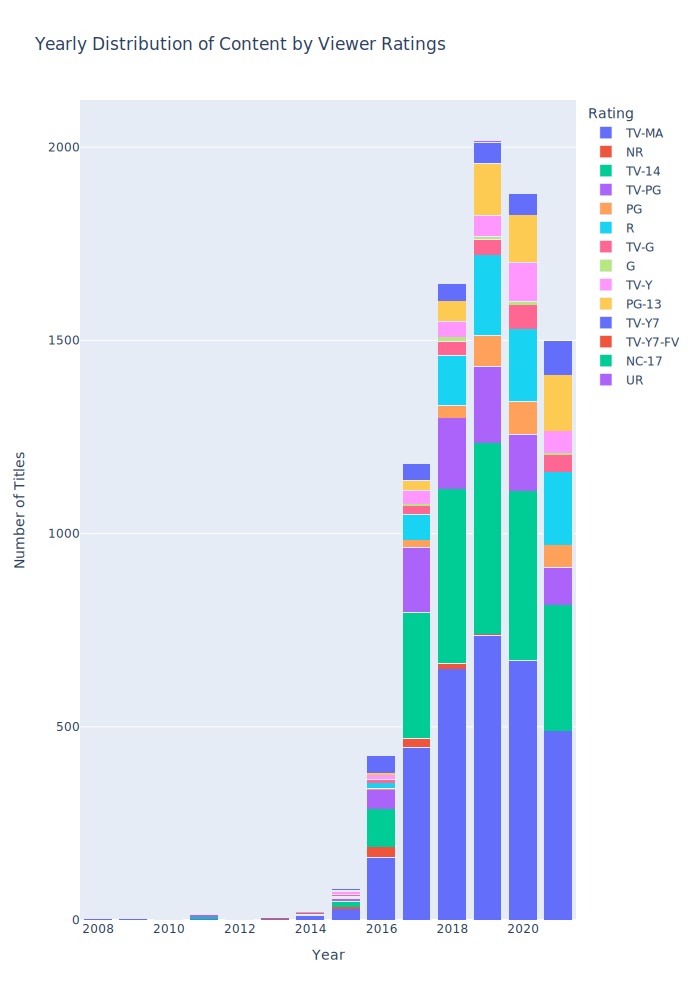

In [5]:
netflix_data['date_added'] = pd.to_datetime(netflix_data['date_added'], errors='coerce')
netflix_data['year_added'] = netflix_data['date_added'].dt.year
netflix_data.dropna(subset=['year_added'], inplace=True)

year_rating_counts = netflix_data.groupby(['year_added', 'rating']).size().reset_index(name='count')

fig = px.bar(year_rating_counts, x='year_added', y='count', color='rating',
             title='Yearly Distribution of Content by Viewer Ratings', height=1000,
             labels={'year_added': 'Year', 'count': 'Number of Titles', 'rating': 'Rating'})
fig.update_layout(barmode='stack', xaxis={'categoryorder':'total descending'})

# pyo.iplot(fig) #Uncomment to generate interactive plots
fig.show("svg")

The yearly distribution of viewer ratings shows an increasing trend in TV-MA rated content, reflecting a shift towards producing and acquiring more mature content over the years.

-----------------------------------------------------------------------

# 4. Analysis of Content Production by Country

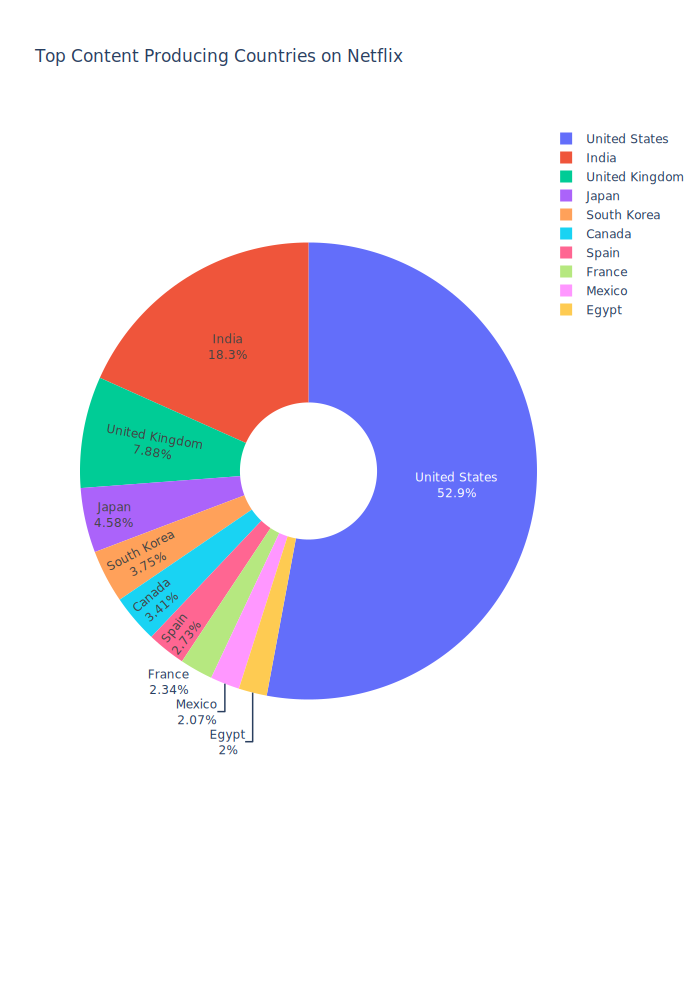

In [6]:
country_data = netflix_data[netflix_data['country'] != 'Unknown']

country_content_counts = country_data['country'].value_counts().head(10).reset_index()
country_content_counts.columns = ['Country', 'Number of Titles']

fig = px.pie(country_content_counts, values='Number of Titles', names='Country',
             title='Top Content Producing Countries on Netflix', height=1000,
             labels={'Number of Titles': 'Number of Titles', 'Country': 'Country'},
             hole=0.3)

fig.update_traces(textinfo='percent+label', showlegend=True)

# pyo.iplot(fig) #Uncomment to generate interactive plots
fig.show("svg")

The top content-producing countries on Netflix are:

1. **United States**: 2,809 titles
2. **India**: 972 titles
3. **United Kingdom**: 418 titles
4. **Japan**: 243 titles
5. **South Korea**: 199 titles

This data emphasizes Netflix's strong presence and content production capabilities in these crucial regions, especially in the United States and India.

-----------------------------------------------------------------------

# 5. Visualisation of Duration Data

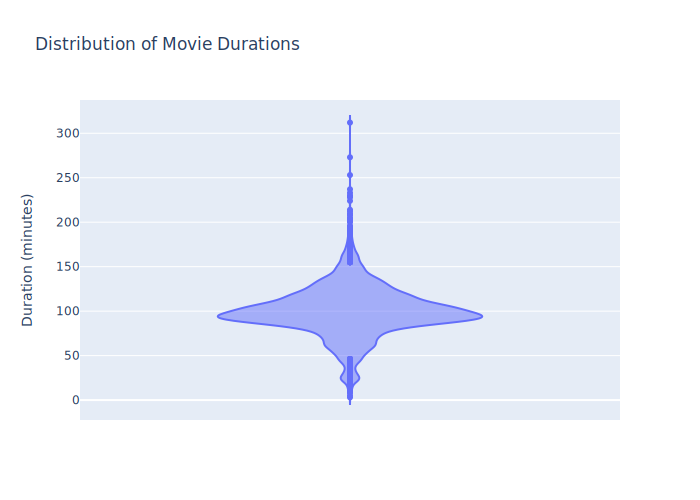

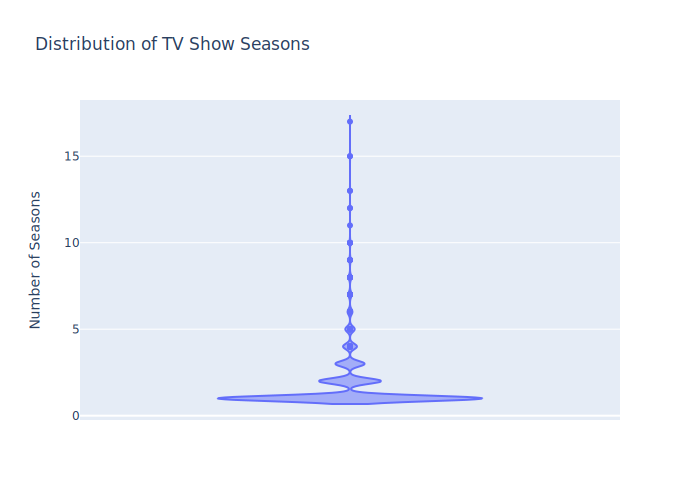

In [7]:
def standardize_duration(row):
    duration = row['duration']
    if 'min' in duration:  # For movies
        return int(duration.replace(' min', ''))
    elif 'Season' in duration:  # For TV shows
        return int(duration.replace(' Seasons', '')) if 'Seasons' in duration else int(duration.replace(' Season', ''))
    return None

netflix_data['duration_numeric'] = netflix_data.apply(standardize_duration, axis=1)
netflix_data['movie_duration'] = netflix_data.apply(lambda x: x['duration_numeric'] if 'min' in x['duration'] else None, axis=1)
netflix_data['tv_seasons'] = netflix_data.apply(lambda x: x['duration_numeric'] if 'Season' in x['duration'] else None, axis=1)


# Violin Plot for Movies
fig_movies_violin = px.violin(netflix_data[netflix_data['type'] == 'Movie'], y='movie_duration', 
                              title='Distribution of Movie Durations',
                              labels={'movie_duration': 'Duration (minutes)'})

# pyo.iplot(fig_movies_violin) #Uncomment to generate interactive plots
fig_movies_violin.show("svg")

# Violin Plot for TV Shows
fig_shows_violin = px.violin(netflix_data[netflix_data['type'] == 'TV Show'], y='tv_seasons', 
                             title='Distribution of TV Show Seasons',
                             labels={'tv_seasons': 'Number of Seasons'})

# pyo.iplot(fig_shows_violin) #Uncomment to generate interactive plots
fig_shows_violin.show("svg")

Violin plots combine aspects of box plots and density plots, which helps in understanding not only the central tendency and spread of the data but also the distribution shape. This visualisation reveals the concentration and spread of movie durations and TV show seasons, highlighting common lengths and the variability in the data.

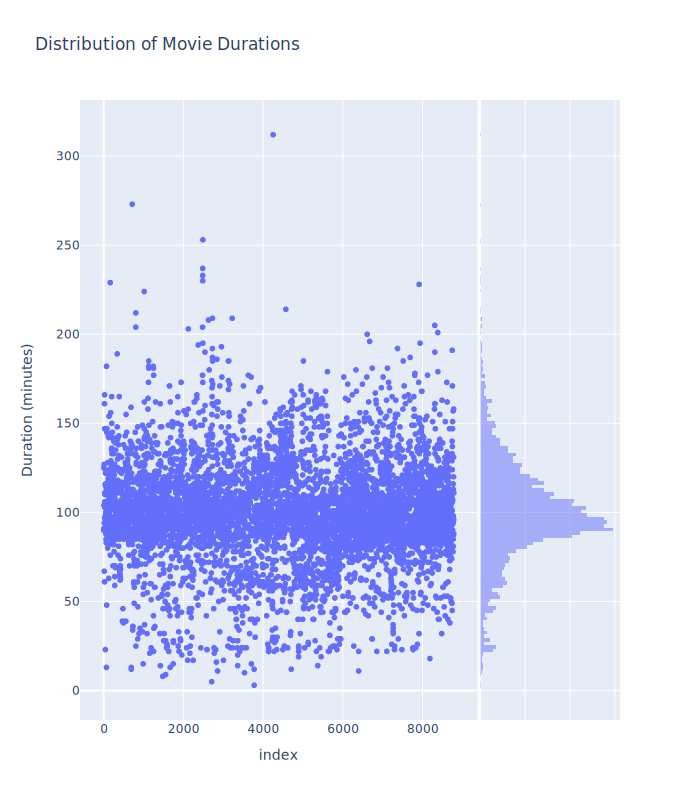

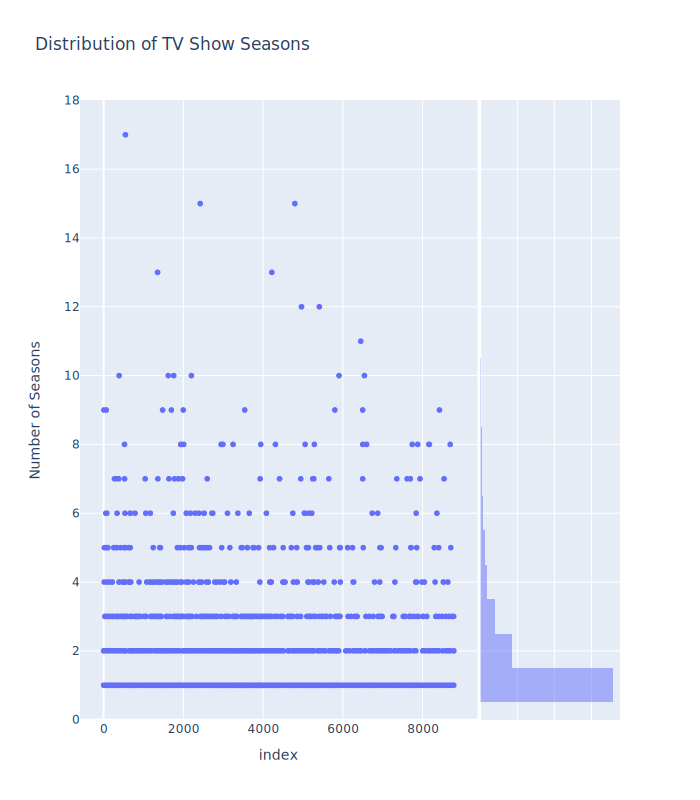

In [8]:
# Combined Scatter Plot with Marginal Distributions 
fig_movies_scatter = px.scatter(netflix_data[netflix_data['type'] == 'Movie'], y='movie_duration', 
                                title='Distribution of Movie Durations',
                                labels={'movie_duration': 'Duration (minutes)'},
                                hover_data=['title','listed_in','rating'],
                                height=800,
                                marginal_y='histogram')

# pyo.iplot(fig_movies_scatter) #Uncomment to generate interactive plots
fig_movies_scatter.show("svg")

fig_shows_scatter = px.scatter(netflix_data[netflix_data['type'] == 'TV Show'], y='tv_seasons', 
                               title='Distribution of TV Show Seasons',
                               labels={'tv_seasons': 'Number of Seasons'},
                               hover_data=['title','listed_in','rating'],
                               height=800,
                               marginal_y='histogram')

# pyo.iplot(fig_shows_scatter) #Uncomment to generate interactive plots
fig_shows_scatter.show("svg")

The plots provide a visual representation of the distribution of movie durations and TV show seasons on Netflix. 
1. Most movies have durations around 90-120 minutes, which aligns with typical feature film lengths.
2. TV shows on Netflix generally have 1-2 seasons. This trend indicates a high turnover rate for new series, reflecting Netflix's strategy to constantly refresh its content. 

-----------------------------------------------------------------------

# 6. Most Frequent Actors/Actresses

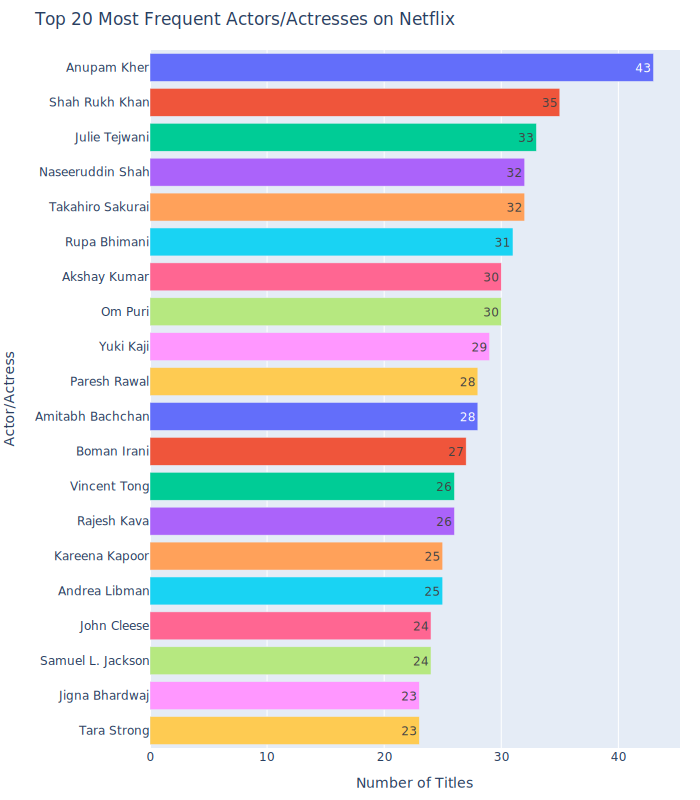

In [9]:
netflix_data['cast'] = netflix_data['cast'].str.split(', ')
cast_data = netflix_data.explode('cast')

cast_data = cast_data[~cast_data['cast'].isin(['', 'Unknown'])]

# Count the occurrences of each actor
actor_counts = cast_data['cast'].value_counts().reset_index()
actor_counts.columns = ['actor', 'count']

# Plot the top 20 most frequent actors
fig = px.bar(actor_counts.head(20), y='actor', x='count',
             title='Top 20 Most Frequent Actors/Actresses on Netflix',
             labels={'count':'Number of Titles', 'actor':'Actor/Actress'},
             color='actor', text='count', height=800,
             orientation='h')

fig.update_layout(showlegend=False, margin=dict(l=150, r=20, t=50, b=50))

# pyo.iplot(fig) #Uncomment to generate interactive plots
fig.show("svg")


The most frequent actors appearing in Netflix titles include:

1. **Anupam Kher**: 43 titles
2. **Shah Rukh Khan**: 35 titles
3. **Julie Tejwani**: 33 titles
4. **Naseeruddin Shah**: 32 titles
5. **Takahiro Sakurai**: 32 titles

These actors, predominantly from Bollywood, highlight the significant presence and popularity of Indian content on Netflix.

-----------------------------------------------------------------------

# 7. Day of the Week Trends

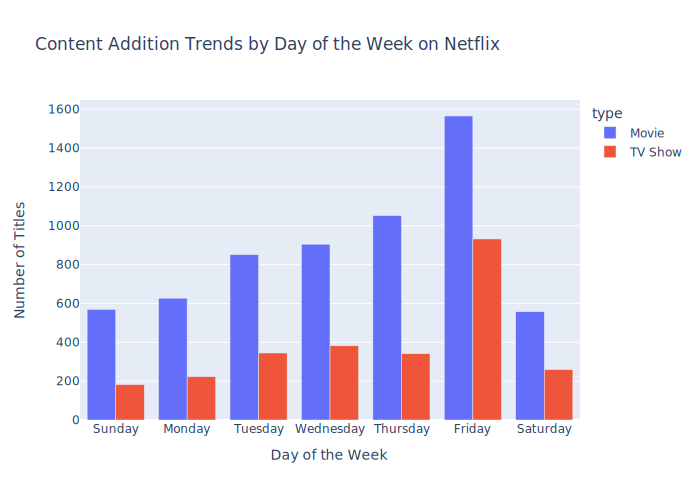

In [10]:
netflix_data['day_of_week_added'] = netflix_data['date_added'].dt.day_name()
dow_content_type = netflix_data.groupby(['day_of_week_added', 'type']).size().unstack().fillna(0)
dow_content_type = dow_content_type.reindex(["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"])

fig = px.bar(dow_content_type, title='Content Addition Trends by Day of the Week on Netflix',
             labels={'value': 'Number of Titles', 'day_of_week_added': 'Day of the Week'},
             barmode='group', category_orders={"day_of_week_added": ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]})

# pyo.iplot(fig) #Uncomment to generate interactive plots
fig.show("svg")

Content addition trends by day of the week show a focus on certain days:

- **Friday**: 1,565 Movies, 932 TV Shows
- **Thursday**: 1,052 Movies, 341 TV Shows

Fridays are peak times for new content releases, likely targeting viewers looking to start their weekend with new shows and movies.

-----------------------------------------------------------------------

# 8. Genre and Cast Analysis

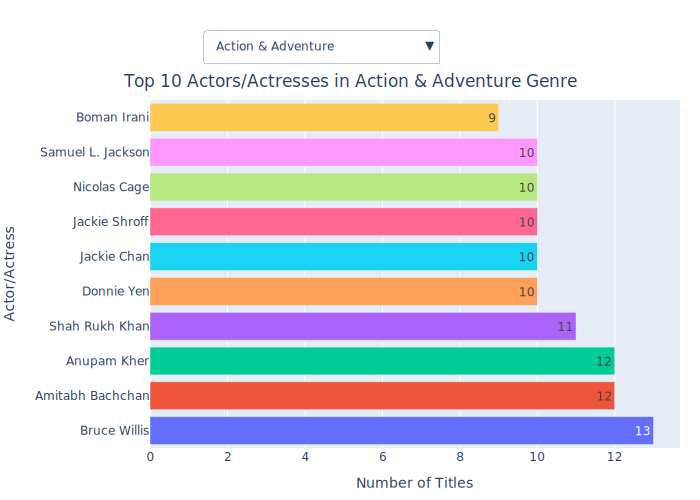

In [11]:
netflix_data = pd.read_csv(file_path)

netflix_data['genre'] = netflix_data['listed_in'].str.split(', ')
netflix_data['cast'] = netflix_data['cast'].str.split(', ')

genre_data = netflix_data.explode('genre')

genre_data = genre_data.explode('cast')

genre_data = genre_data[genre_data['cast'] != '']
genre_data = genre_data[genre_data['cast'] != 'Unknown']

actor_genre_counts = genre_data.groupby(['genre', 'cast']).size().reset_index(name='count')

# Filter for the top 10 actors per genre
top_actors_per_genre = actor_genre_counts.groupby('genre').apply(lambda x: x.nlargest(10, 'count')).reset_index(drop=True)

# Color map for the actors using a color palette
unique_actors = top_actors_per_genre['cast'].unique()
colors = colors.qualitative.Plotly
color_map = {actor: colors[i % len(colors)] for i, actor in enumerate(unique_actors)}

fig = make_subplots(rows=1, cols=1)

initial_genre = top_actors_per_genre['genre'].unique()[0]
initial_data = top_actors_per_genre[top_actors_per_genre['genre'] == initial_genre]
initial_colors = [color_map[actor] for actor in initial_data['cast']]

fig.add_trace(go.Bar(x=initial_data['count'], y=initial_data['cast'], 
                     orientation='h', text=initial_data['count'], 
                     textposition='auto', name=initial_genre, 
                     marker=dict(color=initial_colors)))

fig.update_layout(
    xaxis_title='Number of Titles', 
    yaxis_title='Actor/Actress',
    showlegend=False, 
    margin=dict(l=150, r=20, t=100, b=50),
    updatemenus=[dict(
        active=0, 
        buttons=[dict(label=genre,
                      method='update',
                      args=[{'x': [top_actors_per_genre[top_actors_per_genre['genre'] == genre]['count']],
                             'y': [top_actors_per_genre[top_actors_per_genre['genre'] == genre]['cast']],
                             'text': [top_actors_per_genre[top_actors_per_genre['genre'] == genre]['count']],
                             'orientation': ['h'],
                             'type': 'bar'},
                            {'title': f'Top 10 Actors/Actresses in {genre} Genre'}])
                 for genre in top_actors_per_genre['genre'].unique()],
        x=0.1,
        xanchor='left',
        y=1.2,
        yanchor='top'
    )]
)

fig.update_layout(
    title={
        'text': f'Top 10 Actors/Actresses in {initial_genre} Genre',
        'y':0.85,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    }
)

# pyo.iplot(fig) #Uncomment to generate interactive plots
fig.show("svg")